# Milestone 2

In [2]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import os

import numpy as np 
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

## 1. Experiment Tracking (10%)

Please do this to install comet_ml pip <br>
> conda activate ift6758-conda-env <br>
> conda install pip<br>
> which pip<br>
> pip install comet_ml<br>



In [4]:
import comet_ml
comet_ml.init()

from comet_ml import Experiment
experiment = Experiment(
    project_name="milestone-2",
    workspace="binulal",
)

COMET INFO: Comet API key is valid
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/binulal/milestone-2/dafea7d564d041cba395351a5d46d0f4



## 2. Feature Engineering - I (10%)

* Acquire all of the raw play-by-play data for the 2015/16 season all the way to the 2019/20 season (inclusive).
* Set aside all of the 2019/20 data as your final test set. 
* You will use the 2015/16 - 2018/19 regular season data to create your training and validation sets. 
* Until Part 7, any reference to the “dataset” will exclusively refer to the 2015/16 - 2018/19 data


In [5]:
from ift6758.data.functions import loadstats
from ift6758.data.tidyData import tidyData

In [6]:

dfs_2015 = loadstats(2015,'./data/')
df_2015 = tidyData(dfs_2015)

dfs_2016 = loadstats(2016,'./data/')
df_2016 = tidyData(dfs_2016)

dfs_2017 = loadstats(2017,'./data/')
df_2017 = tidyData(dfs_2017)

dfs_2018 = loadstats(2018,'./data/')
df_2018 = tidyData(dfs_2018)

dfs_2019 = loadstats(2019,'./data/')
#df_2019 = tidyData(dfs_2019) <---- do this on section# 7

Error code: 404 at gameID:2015021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2015030126. Game not found.
Error code: 404 at gameID:2015030137. Game not found.
Error code: 404 at gameID:2015030146. Game not found.
Error code: 404 at gameID:2015030157. Game not found.
Error code: 404 at gameID:2015030187. Game not found.
Error code: 404 at gameID:2015030216. Game not found.
Error code: 404 at gameID:2015030417. Game not found.
size of data in regular season & playoffs: 1325
Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:201

In [7]:
df = df_2015.append(df_2016, ignore_index=True).append(df_2017, ignore_index=True).append(df_2018, ignore_index=True).dropna()

In [8]:
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df.shape)

(79267, 15)
(80399, 15)
(87137, 15)
(85939, 15)
(332682, 15)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332682 entries, 0 to 332741
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   game_id        332682 non-null  object
 1   event_idx      332682 non-null  object
 2   period         332682 non-null  object
 3   periodTime     332682 non-null  object
 4   teamInfo       332682 non-null  object
 5   isGoal         332682 non-null  object
 6   shotType       332682 non-null  object
 7   coordinates_x  332682 non-null  object
 8   coordinates_y  332682 non-null  object
 9   shooter        332682 non-null  object
 10  goalie         332682 non-null  object
 11  emptyNet       332682 non-null  object
 12  strength       332682 non-null  object
 13  awayTeam       332682 non-null  object
 14  homeTeam       332682 non-null  object
dtypes: object(15)
memory usage: 40.6+ MB


#### Using your training dataset create a tidied dataset for each SHOT event, with the following columns (you can name them however you want):
* Distance from net
* Angle from net
* Is goal (0 or 1)
* Empty Net (0 or 1; you can assume NaNs are 0)


You can approximate the net as a single point (i.e. you don’t need to account for the width of the net when computing the distance or angle). 

You should be able to create this easily using the functionality you implemented for tidying data in Milestone 1, as you will only need the (x, y) coordinates for each shot event. 


In [10]:
opponent_coordinate = [-90,0]

playerXYCoordDF = df[["coordinates_x","coordinates_y"]]
playerXYCoordDF.head()

playerXY_DF = playerXYCoordDF.apply( lambda x : pd.Series( opponent_coordinate, index = ['opponent_x', 'opponent_y'] ), axis=1, result_type="expand")
playerXY_DF.head()

playerXY_DF2 = playerXYCoordDF.join(playerXY_DF)

# playerXY_DF3 
df["Distance"]  = playerXY_DF2.apply( lambda row : np.sqrt((row.opponent_x - row.coordinates_x)**2 +  row.coordinates_y**2) if (row.coordinates_x < 0) else np.sqrt((-row.opponent_x - row.coordinates_x)**2 + row.coordinates_y**2), axis=1 , result_type="expand" )


In [11]:
df.head()

,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam,Distance
0,2015020001,7,1,00:51,Toronto Maple Leafs,False,Wrist Shot,-55.0,6.0,Brad Boyes,Carey Price,False,NA,Montréal Canadiens,Toronto Maple Leafs,35.510562
1,2015020001,9,1,01:05,Toronto Maple Leafs,False,Snap Shot,-79.0,0.0,Nazem Kadri,Carey Price,False,NA,Montréal Canadiens,Toronto Maple Leafs,11.000000
2,2015020001,10,1,01:06,Toronto Maple Leafs,False,Snap Shot,-75.0,-1.0,Nazem Kadri,Carey Price,False,NA,Montréal Canadiens,Toronto Maple Leafs,15.033296
3,2015020001,13,1,01:53,Toronto Maple Leafs,False,Wrist Shot,-55.0,-36.0,Daniel Winnik,Carey Price,False,NA,Montréal Canadiens,Toronto Maple Leafs,50.209561
4,2015020001,21,1,02:37,Toronto Maple Leafs,False,Tip-In,-61.0,-1.0,Joffrey Lupul,Carey Price,False,NA,Montréal Canadiens,Toronto Maple Leafs,29.017236


Create and include the following figures in your blogpost and briefly discuss your observations (few sentences):

* A histogram of shot counts (goals and no-goals separated), binned by distance
* A histogram of shot counts (goals and no-goals separated), binned by angle
* A 2D histogram where one axis is the distance and the other is the angle. You do not need to separate goals and no-goals.
 Hint: check out jointplots. 
*As always, make sure all of your axes are labeled correctly, and you make the appropriate choice of axis scale.


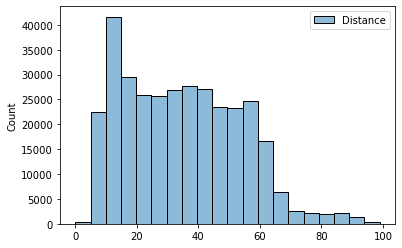

In [23]:
import seaborn as sns
ax = sns.histplot( df[["Distance"]], bins=20)

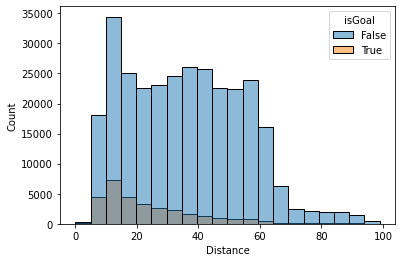

In [22]:
ax = sns.histplot( df, x = "Distance", hue="isGoal", bins=20)

## 3. Baseline Models (15%)

In [62]:
data["isGoal"].apply( lambda x : 1 if x else 0 )

0         0
1         0
2         0
3         0
4         0
         ..
332737    1
332738    0
332739    0
332740    0
332741    1
Name: isGoal, Length: 332682, dtype: int64

In [48]:
np.unique(data["Distance"], return_counts=True )

(array([ 0.        ,  1.        ,  2.        , ..., 98.08669635,
        98.48857802, 98.89893832]),
 array([3, 4, 4, ..., 7, 6, 2]))

In [106]:
# "shotType" - encode
# "shooter", "goalie", encode or drop
#  "awayTeam", "homeTeam",
data = df[["Distance", "isGoal"]]
data = data.dropna()
X = data[["Distance"]]
y = data["isGoal"].apply( lambda x : 1 if x else 0 )

In [107]:
X.shape

(332682, 1)

* Logistic Regression

In [108]:
y.shape

(332682,)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [112]:
y_pred = clf.predict(X_test)

In [113]:
clf.predict_proba(X_test)

array([[0.87353273, 0.12646727],
       [0.96079389, 0.03920611],
       [0.80922564, 0.19077436],
       ...,
       [0.91595544, 0.08404456],
       [0.80992959, 0.19007041],
       [0.85925354, 0.14074646]])

In [114]:
#clf.score(X_train, y_train)

In [115]:
clf.score(X_test, y_test)

0.9055252946641649

In [116]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

/home/binulal/.conda/envs/ift6758-conda-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
metrics = {"f1":f1,
"recall":recall,
"precision":precision
}

experiment.log_dataset_hash(X_train)
experiment.log_metrics(metrics)

COMET ERROR: Error creating confusion matrix: if you give y_true OR y_predicted you must give both; ignoring


In [118]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/binulal/milestone-2/8b8190ca8246490e92913c5dcf607e02
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.0
COMET INFO:     precision : 0.0
COMET INFO:     recall    : 0.0
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (19.72 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     os packages              : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading 1 metrics, params and output messages


## 4. Feature Engineering - II (20% + bonus 5%) 

## 5. Advanced Models (20%)

## 6. Give it your best shot! (25%)

## 7. Evaluate on test set (10%)

## 8. Blog Post (upto 30% penalty)